# Analysis of Air Quality in New York City
Collaborators: Mahinsa Bambarende

## Introduction
Air quality is a critical issue that affects the health of residents in urban areas such as New York City. Pollution from traffic, industry, and other sources can have serious health consequences, making it crucial to analyze air quality data to understand the extent of the problem and identify potential solutions.

In this tutorial, we will use Python and various libraries to collect, preprocess, and analyze air quality data for NYC. By exploring the data using visualization techniques and statistical analysis, we aim to identify trends, patterns, and factors affecting air quality in the city.

The ultimate goal of our analysis is to draw conclusions and make recommendations for improving air quality in NYC. Policymakers can use our findings to develop targeted interventions that reduce pollution and improve public health. As individuals, analyzing air quality data can raise awareness and encourage people to take action to reduce their own contribution to pollution through sustainable practices like using public transportation or reducing energy consumption.

Throughout this tutorial, we will follow the Data Science Lifecycle:

1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Model: Analysis, Hypothesis Testing, & ML
5. Interpretation: Insight & Policy Decision

By the end of this tutorial, you will have a better understanding of how to use data analysis techniques to address real-world environmental challenges and make informed policy decisions.

## Data Collection
The first step in our analysis of air quality in NYC is data collection. To conduct a thorough analysis, we need reliable and comprehensive data on air quality in the city. In this stage, we will identify data sources, gather data, and prepare it for analysis.

There are several data sources available for air quality data in NYC, including the Environmental Protection Agency (EPA) and the New York State Department of Environmental Conservation (DEC). These organizations provide data on various air pollutants such as sulfur dioxide, ozone, nitrogen dioxide, and particulate matter, among others.

We will be using the NYC Environment and Health Data Portal as our primary data source and can be obtained here: https://catalog.data.gov/dataset/air-quality

The dataset contains a lot of information regarding sources of air pollution, health effects, and overall levels in the city from 2009-2020.

But before that, to start here are all the libraries going to be used in this tutorial. Talk about pandas and numpy more...

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ggplot import *
import statsmodels.formula.api
from sklearn import linear_model
import seaborn as sns

import folium

Our first step is to import our air quality data. We do this by using the pandas function read_csv which takes in the data from the csv file and places it in a dataframe.
Notice how all the important data like hospitalizations and greenhouse gas emissions are clumped into one table, making it hard to understand what the data is conveying. This is where the data processing step is introduced to help clean the data to become more useful in our analysis.

In [283]:
data = pd.read_csv("Air_Quality.csv")
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70,NaN
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56,NaN
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65,NaN
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28,NaN


In addition we are going to be using a map later on for visualization so lets load that too. You can obtain this through: https://github.com/nychealth/EHDP-data/blob/production/geography/GeoLookup.csv

In [284]:
map = pd.read_csv("GeoLookup.csv")
map.head()

,GeoType,GeoTypeDesc,GeoTypeShortDesc,GeoID,Name,BoroID,Borough,Lat,Long
0,Citywide,Citywide,Citywide,1,New York City,NaN,NaN,NaN,NaN
1,Borough,Borough,Borough,1,Bronx,1.0,Bronx,40.8526,-73.8665
2,Borough,Borough,Borough,2,Brooklyn,2.0,Brooklyn,40.6447,-73.9479
3,Borough,Borough,Borough,3,Manhattan,3.0,Manhattan,40.7772,-73.9672
4,Borough,Borough,Borough,4,Queens,4.0,Queens,40.7076,-73.8185


## Data Processing
Once we have collected the air quality data for NYC, the next step is to process the data to make it ready for analysis. Data processing involves a series of tasks to clean, transform, and aggregate the raw data into a more usable format. By performing these data processing tasks, we can ensure that our data is consistent, complete, and in a format that is suitable for analysis. This will help us to gain insights into the factors affecting air quality in NYC and develop strategies for improving it.

To start this step, let's begin by cleaning and seperating the data to become more useful for us. Let's drop the message column as it seems to be empty throughout. And the start date column as we are not going to be using it in the tutorial. Additionally, let's list all the unique names in the Name table to help determine how we are cleaning the data.

In [285]:
data = data.drop(['Message', 'Start_Date'], axis=1)
names = data.Name.unique()
names

array(['Ozone (O3)', 'Sulfur Dioxide (SO2)', 'PM2.5-Attributable Deaths',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Air Toxics Concentrations- Average Benzene Concentrations',
       'Air Toxics Concentrations- Average Formaldehyde Concentrations',
       'PM2.5-Attributable Asthma Emergency Department Visits',
       'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)',
       'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)',
       'Traffic Density- Annual Vehicle Miles Traveled',
       'O3-Attributable Cardiac and Respiratory Deaths',
       'O3-Attributable Asthma Emergency Department Visits',
       'O3-Attributable Asthma Hospitalizations',
       'Traffic Density- Annual Vehicle Miles Traveled for Cars',
       'Traffic Density- Annual Vehicle Miles Traveled for Trucks',
       'Nitrogen Dioxide (NO2)', 'Fine Partic

Now we can see how we might split the data to seperate tables. Let's first get the data for each type of pollutant. To begin first set a table for mean Ozone levels in NYC. 

Let's also drop some of the columns as they hold unnecessary information like Measure, Measure Info, and Indicator ID. This is because they are the same throughout what we are seperating.

We'll also use some of the map data to set the lattitutdes and longitudes for easier visualization

In [287]:
O3 = data[data['Name'] == 'Ozone (O3)']
O3 = O3.drop(['Measure', 'Measure Info', 'Indicator ID'], axis=1)
O3['Lat'] = np.nan
O3['Long'] = np.nan

for i, row  in map.iterrows():
    O3['Lat'] = np.where(O3['Geo Join ID'] == row['GeoID'], row['Lat'], O3['Lat'])
    O3['Long'] = np.where(O3['Geo Join ID'] == row['GeoID'], row['Long'], O3['Long'])
O3

,Unique ID,Name,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Lat,Long
0,216498,Ozone (O3),CD,313,Coney Island (CD13),Summer 2013,34.64,40.5806,-73.9821
1,216499,Ozone (O3),CD,313,Coney Island (CD13),Summer 2014,33.22,40.5806,-73.9821
2,219969,Ozone (O3),Borough,1,Bronx,Summer 2013,31.25,40.8092,-73.8991
3,219970,Ozone (O3),Borough,1,Bronx,Summer 2014,31.15,40.8092,-73.8991
6,219971,Ozone (O3),Borough,2,Brooklyn,Summer 2009,26.27,40.8454,-73.8876
...,...,...,...,...,...,...,...,...,...
16117,671118,Ozone (O3),CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,28.70,40.6764,-73.9945
16118,671119,Ozone (O3),CD,305,East New York and Starrett City (CD5),Summer 2020,29.56,40.6685,-73.8797
16119,671120,Ozone (O3),CD,304,Bushwick (CD4),Summer 2020,29.65,40.6945,-73.9168
16120,671121,Ozone (O3),CD,303,Bedford Stuyvesant (CD3),Summer 2020,29.28,40.6877,-73.9406


Then Sulfur Dioxide

In [288]:
SO2 = data[data['Name'] == 'Sulfur Dioxide (SO2)']
SO2 = SO2.drop(['Measure', 'Measure Info', 'Indicator ID'], axis=1)
SO2['Lat'] = np.nan
SO2['Long'] = np.nan

for i, row  in map.iterrows():
    SO2['Lat'] = np.where(SO2['Geo Join ID'] == row['GeoID'], row['Lat'], SO2['Lat'])
    SO2['Long'] = np.where(SO2['Geo Join ID'] == row['GeoID'], row['Long'], SO2['Long'])
SO2

,Unique ID,Name,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Lat,Long
4,164876,Sulfur Dioxide (SO2),CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,5.89,40.8561,-73.8528
5,164877,Sulfur Dioxide (SO2),CD,212,Williamsbridge and Baychester (CD12),Winter 2008-09,5.75,40.8863,-73.8515
8,164878,Sulfur Dioxide (SO2),CD,301,Greenpoint and Williamsburg (CD1),Winter 2008-09,4.33,40.7168,-73.9472
9,164879,Sulfur Dioxide (SO2),CD,302,Fort Greene and Brooklyn Heights (CD2),Winter 2008-09,4.41,40.6935,-73.9787
10,164880,Sulfur Dioxide (SO2),CD,303,Bedford Stuyvesant (CD3),Winter 2008-09,4.73,40.6877,-73.9406
...,...,...,...,...,...,...,...,...,...
10222,405357,Sulfur Dioxide (SO2),CD,413,Queens Village (CD13),Winter 2015-16,0.26,40.6996,-73.7373
10223,405358,Sulfur Dioxide (SO2),CD,414,Rockaway and Broad Channel (CD14),Winter 2015-16,0.20,40.5891,-73.8103
10224,405359,Sulfur Dioxide (SO2),CD,501,St. George and Stapleton (CD1),Winter 2015-16,0.13,40.8427,-73.9003
10225,405360,Sulfur Dioxide (SO2),CD,502,South Beach and Willowbrook (CD2),Winter 2015-16,0.12,40.8132,-73.8881


Nitrogen Dioxide

In [289]:
NO2 = data[data['Name'] == 'Nitrogen Dioxide (NO2)']
NO2 = NO2.drop(['Measure', 'Measure Info', 'Indicator ID'], axis=1)
NO2['Lat'] = np.nan
NO2['Long'] = np.nan

for i, row  in map.iterrows():
    NO2['Lat'] = np.where(NO2['Geo Join ID'] == row['GeoID'], row['Lat'], NO2['Lat'])
    NO2['Long'] = np.where(NO2['Geo Join ID'] == row['GeoID'], row['Long'], NO2['Long'])
NO2

,Unique ID,Name,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Lat,Long
1822,165739,Nitrogen Dioxide (NO2),CD,101,Financial District (CD1),Winter 2008-09,41.26,40.7074,-74.0120
1823,165740,Nitrogen Dioxide (NO2),CD,102,Greenwich Village and Soho (CD2),Winter 2008-09,39.68,40.7298,-74.0015
1824,165741,Nitrogen Dioxide (NO2),CD,103,Lower East Side and Chinatown (CD3),Winter 2008-09,36.88,40.7196,-73.9855
1825,165742,Nitrogen Dioxide (NO2),CD,104,Clinton and Chelsea (CD4),Winter 2008-09,40.88,40.7554,-73.9975
1826,165743,Nitrogen Dioxide (NO2),CD,105,Midtown (CD5),Winter 2008-09,50.56,40.7523,-73.9841
...,...,...,...,...,...,...,...,...,...
15555,667862,Nitrogen Dioxide (NO2),CD,502,South Beach and Willowbrook (CD2),Winter 2019-20,18.24,40.8132,-73.8881
15556,667863,Nitrogen Dioxide (NO2),CD,502,South Beach and Willowbrook (CD2),Summer 2020,7.50,40.8132,-73.8881
15557,667867,Nitrogen Dioxide (NO2),CD,503,Tottenville and Great Kills (CD3),Annual Average 2020,10.49,40.8809,-73.8366
15558,667868,Nitrogen Dioxide (NO2),CD,503,Tottenville and Great Kills (CD3),Winter 2019-20,15.11,40.8809,-73.8366


And finally, Fine Particles

In [290]:
PM2 = data[data['Name'] == 'Fine Particulate Matter (PM2.5)']
PM2 = PM2.drop(['Measure', 'Measure Info', 'Indicator ID'], axis=1)
PM2['Lat'] = np.nan
PM2['Long'] = np.nan

for i, row  in map.iterrows():
    PM2['Lat'] = np.where(PM2['Geo Join ID'] == row['GeoID'], row['Lat'], PM2['Lat'])
    PM2['Long'] = np.where(PM2['Geo Join ID'] == row['GeoID'], row['Long'], PM2['Long'])
PM2

,Unique ID,Name,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Lat,Long
2709,168394,Fine Particulate Matter (PM2.5),CD,101,Financial District (CD1),Winter 2008-09,15.74,40.7074,-74.0120
2710,168395,Fine Particulate Matter (PM2.5),CD,102,Greenwich Village and Soho (CD2),Winter 2008-09,15.21,40.7298,-74.0015
2711,168396,Fine Particulate Matter (PM2.5),CD,103,Lower East Side and Chinatown (CD3),Winter 2008-09,14.24,40.7196,-73.9855
2712,168397,Fine Particulate Matter (PM2.5),CD,104,Clinton and Chelsea (CD4),Winter 2008-09,15.48,40.7554,-73.9975
2713,168398,Fine Particulate Matter (PM2.5),CD,105,Midtown (CD5),Winter 2008-09,18.84,40.7523,-73.9841
...,...,...,...,...,...,...,...,...,...
15978,669980,Fine Particulate Matter (PM2.5),CD,502,South Beach and Willowbrook (CD2),Winter 2019-20,6.89,40.8132,-73.8881
15979,669981,Fine Particulate Matter (PM2.5),CD,502,South Beach and Willowbrook (CD2),Summer 2020,6.55,40.8132,-73.8881
15980,669982,Fine Particulate Matter (PM2.5),CD,503,Tottenville and Great Kills (CD3),Annual Average 2020,5.32,40.8809,-73.8366
15981,669983,Fine Particulate Matter (PM2.5),CD,503,Tottenville and Great Kills (CD3),Winter 2019-20,5.95,40.8809,-73.8366


## Exploratory Analysis & Data Visualization
Let us begin by plotting out the total annual averages of each type of pollutant to see if there is any trend that is occurring. Let us also plot the mean quality for some of the major Boroughs (Bronx, Brooklyn, Manhattan, Staten Islands, and the Queens). 

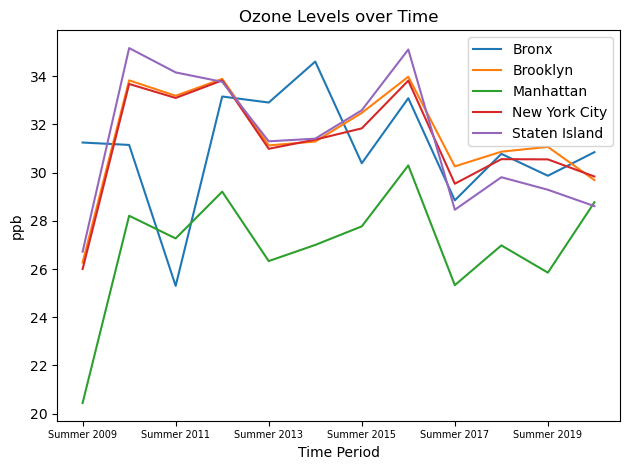

In [208]:
places = ['New York City', 'Bronx', 'Brooklyn', 'Manhattan', 'Staten Island']
place_plots = O3[O3["Geo Place Name"].isin(places)]
place_plots.set_index('Time Period', inplace=True)
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.xlabel('Time Period')
plt.ylabel('ppb')
plt.title('Ozone Levels over Time')  
plt.tick_params(axis='x', which='major', labelsize=7)
plt.tight_layout()
plt.show()

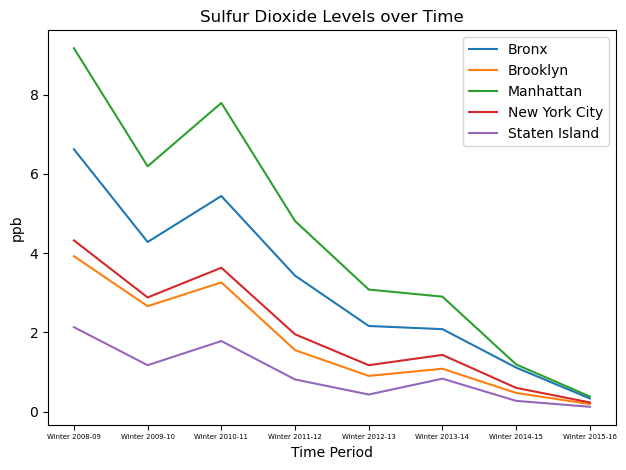

In [129]:
place_plots = SO2[SO2["Geo Place Name"].isin(places)]
place_plots.set_index('Time Period', inplace=True)
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.xlabel('Time Period')
plt.ylabel('ppb')
plt.title('Sulfur Dioxide Levels over Time')  
plt.tick_params(axis='x', which='major', labelsize=5)
plt.tight_layout()
plt.show()

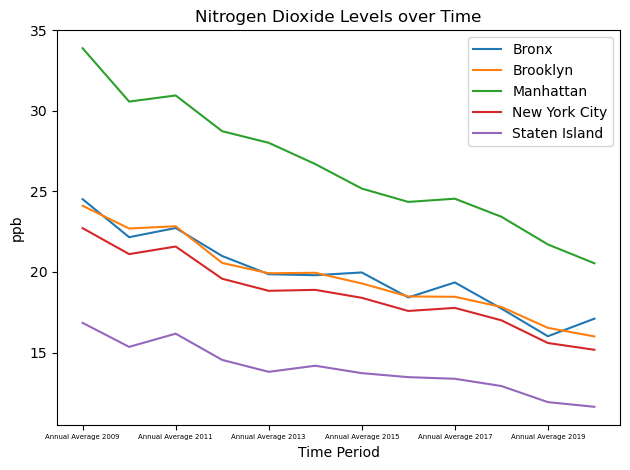

In [130]:
NO2_annual = NO2[NO2["Time Period"].str.contains("Annual")]
place_plots = NO2_annual[NO2_annual["Geo Place Name"].isin(places)]
place_plots.set_index('Time Period', inplace=True)
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.xlabel('Time Period')
plt.ylabel('ppb')
plt.title('Nitrogen Dioxide Levels over Time')  
plt.tick_params(axis='x', which='major', labelsize=5)
plt.tight_layout()
plt.show()

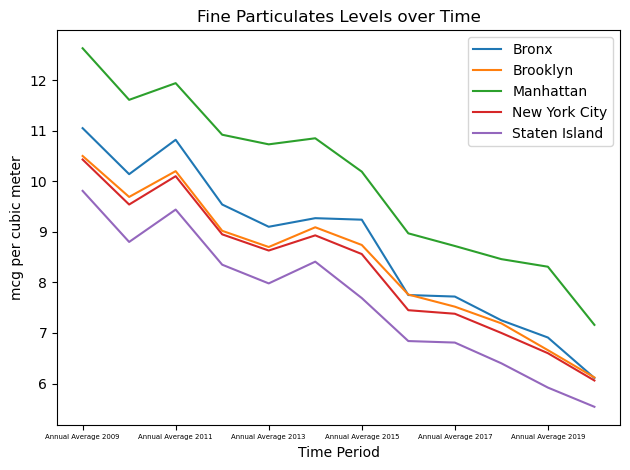

In [131]:
PM2_annual = PM2[PM2["Time Period"].str.contains("Annual")]
place_plots = PM2_annual[PM2_annual["Geo Place Name"].isin(places)]
place_plots.set_index('Time Period', inplace=True)
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.xlabel('Time Period')
plt.ylabel('mcg per cubic meter')
plt.title('Fine Particulates Levels over Time')  
plt.tick_params(axis='x', which='major', labelsize=5)
plt.tight_layout()
plt.show()

It seems that other than Ozone, there is a clear trend of pollutants reducing over time. But this data only goes until 2020, so it would be useful to predict if this trend would stay in the future. This is where the Modeling and Machine Learning process can become important but more to that later.

For now, even though we visualized the averages of the whole city, it is hard to tell where the worst is. And also how much has this impacted the people living there.

In [272]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
O3_CD = O3[O3['Time Period'] == 'Summer 2019'].dropna()
O3_CD

def color_producer(ammount):
    if ammount > 35:
        return 'red'    
    elif 30 < ammount <= 35 :
        return 'orange'
    elif 25 < ammount <= 30 :
        return 'green'
    elif 20 < ammount <= 25:
        return 'blue'
    else:
        return 'gray'

# Add markers for each air quality monitoring station
for index, row in O3_CD.iterrows():
    lat = row['Lat']
    lon = row['Long']
    name = row['Geo Place Name']
    folium.CircleMarker(
        location=[lat, lon], 
        radius=5,
        fill = True,
        fill_opacity = .5, # Setting the inner circle opacity
        color = color_producer(row['Data Value']),
        opacity = 0.4,
        popup=name
    ).add_to(nyc_map)

# Display the map
nyc_map
# O3_CD